# Trabajo: Eliminación de artefactos impulsivos en una imagen

* Objetivos

* La actividad persigue que el alumno se familiarice con el tratamiento del ruido de naturaleza impulsiva en una imagen.
* Para ello, se pide que el alumno sea capaz de generar de forma artificial los artefactos de este tipo, así como de aplicar los filtros necesarios para su eliminación.


* Descripción

* Se pide que el alumno cree funciones o scripts en Python basados en el uso de las librerías «numpy» y «skimage». 
* Estos deben llevar a cabo diferentes operaciones que se describen a continuación.
* Para ellas, se tomará como entrada la imagen «Astronaut», disponible en la librería «skimage».


* Crear una función que modele la adición, de forma aleatoria, de artefactos impulsivos. 
* El resultado deberá apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta». 
* Como se ha visto en la asignatura, estos artefactos toman valores de intensidad máximos o mínimos, y afectan, aleatoriamente, a los píxeles de la imagen. 
* La función a implementar debe aceptar la imagen original y devolver la imagen afectada por el ruido. Además, sería deseable que aceptara un argumento adicional para indicar el porcentaje de píxeles que se verán afectados por estos artefactos.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import io
from skimage import color
from skimage import img_as_float





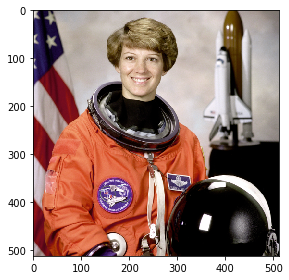

In [2]:
img=data.astronaut()
io.imshow(img)

* Cargamos la imagen que esta por defecto en la liberia skimage 

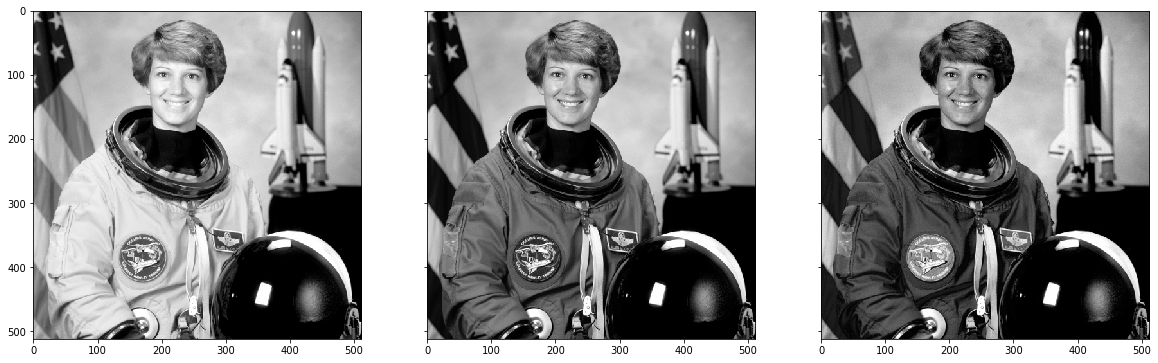

In [3]:
r = img[:,:,0]# la primera capa corresponde al color rojo
g = img[:,:,1]# la segunda capa corresponde al color verde
b = img[:,:,2]# la primera capa corresponde al color azul

# Vamos a representar cada uno de estos canales o colores por separado para apreciar las diferencias

fig,(ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(20,20), sharex=True, sharey=True)
ax1.imshow(r, cmap='gray')
ax2.imshow(g, cmap='gray')
ax3.imshow(b, cmap='gray')
ax1.set_adjustable('box')
ax2.set_adjustable('box')
ax3.set_adjustable('box')

* Representamos las distintas capas de la imagen y lo sustituimos a escala de grises. Normalmente se trabaja con la escala de grises  del color green, o del segundo nivel. Nosotros nos quedamos con esa imagen para realizar nuestro ejercicio.

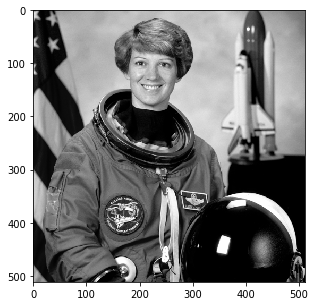

In [4]:
img_verde = img[:,:,1]
fig, ax2 = plt.subplots(ncols=1, figsize=(5,5), sharex=True, sharey=True)
ax2.imshow(img_verde, cmap='gray')
ax2.set_adjustable('box')

In [5]:
img_verde.shape

(512, 512)

In [6]:
print(img_verde)

[[147 103  58 ... 120 117 119]
 [171 141 114 ... 118 115 116]
 [194 178 165 ... 120 116 114]
 ...
 [170 170 168 ...   0   0   0]
 [169 167 164 ...   0   1   0]
 [167 165 162 ...   0   1   0]]


* Crear una función que modele la adición, de forma aleatoria, de artefactos impulsivos. 
* El resultado deberá apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta». 
* Como se ha visto en la asignatura, estos artefactos toman valores de intensidad máximos o mínimos, y afectan, aleatoriamente, a los píxeles de la imagen. 
* La función a implementar debe aceptar la imagen original y devolver la imagen afectada por el ruido. Además, sería deseable que aceptara un argumento adicional para indicar el porcentaje de píxeles que se verán afectados por estos artefactos.

In [7]:
import numpy as np
import random
import cv2

* Descargamos las librerias necesarias

In [8]:
def sal_y_pimienta(imagen,prob):
    output = np.zeros(imagen.shape,np.uint8)
    thres = 1 - prob 
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = imagen[i][j]
    return output

* Creamos la funcion para introducir el efecto sal y pimienta en la imagen, que contiene dos parametros.
* La imagen a introcudirle el ruido y el tanto por ciento que quiere que afecte a la imagen dicho ruido
* Se introduce de forma aleatoria, teniendo en cuenta el tamaño de la imagen, valores 0 Y 1.

In [9]:
img_verde_syp = sal_y_pimienta(img_verde,0.1)

cv2.imwrite('sp_noise.jpg', img_verde_syp)

True

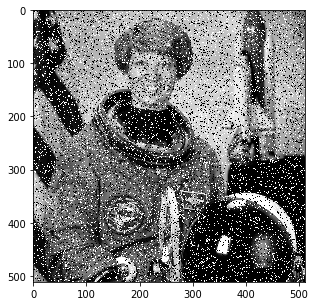

In [10]:
fig, ax5 = plt.subplots(ncols=1, figsize=(5,5), sharex=True, sharey=True)
ax5.imshow(img_verde_syp, cmap='gray')
ax5.set_adjustable('box')

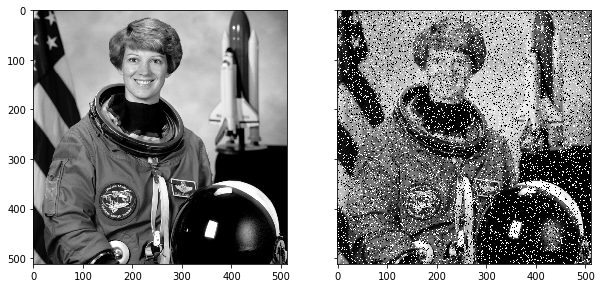

In [11]:
fig, (ax2,ax5) = plt.subplots(ncols=2, figsize=(10,10), sharex=True, sharey=True)
ax2.imshow(img_verde, cmap='gray')
ax2.set_adjustable('box')
ax5.imshow(img_verde_syp, cmap='gray')
ax5.set_adjustable('box')

* Mostramos las dos imagenes juntas para ver mejor el efecto producido

* A partir de la imagen ruidosa, buscaremos eliminar los artefactos impulsivos para el posterior tratamiento de la imagen. 
* Para ello, se deberá aplicar un filtro adecuado para este tipo de ruido.

In [12]:
import cv2

In [13]:
median = cv2.medianBlur(img_verde_syp, 5)

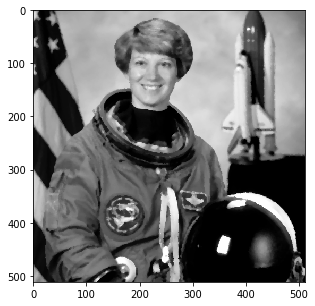

In [14]:
fig, ax6 = plt.subplots(ncols=1, figsize=(5,5), sharex=True, sharey=True)
ax6.imshow(median, cmap='gray')
ax6.set_adjustable('box')

* Por último, a partir de la imagen obtenida en la etapa anterior, se busca identificar las siluetas de las estructuras en ella presentes. Para este fin, se debe identificar y razonar qué tipo de operador corresponde aplicar.

* El filtro de la mediana ha sido normalmente usada sobre señales de una dimension o dos dimensiones.
* Se conoce como ruido del tipo sal y pimienta porque se colocan de forma aleatoria y que toman valores extremos de intensidad 0 o 1
* El filtro de la mediana es una operacion que se aplica punto a punto mediante una ventana deslizante. Donde el tamaño de dicha ventana al estar trabajando en un espacio de dos mimensiones, debe ser un numero impar, ya que la ventana se centra en el punto de la señal que se pretender filtrar. Por tanto, el valor resultante viene dado por la mediana de los puntos considerados en la ventana. Aqui en concreto la ventana es de longitud 5.
* Los operadores usados son del tipo punto a punto,  ya que se caracterizan porque el valor del pixel en la imagen de salida o procesada, depende unicamente del mismo pixel en la imagen de entrada. Hemos usado el ajuste de intensidad (Negativo) para realizar el ejercicio.

In [18]:
def auto_bordes(imagen, sigma):
  # calcular la mediana de las intensidades de píxeles de un solo canal

    v = np.median(imagen)
    
    # aplicar detección automática de bordes utilizando la mediana calculada
    punto_alto = int(max(0, (1.0 - sigma) * v))
    punto_bajo = int(min(255, (1.0 + sigma) * v))
    foto_borde = cv2.Canny(imagen, punto_bajo, punto_alto)

    # devuelve la imagen con los bordes
    return foto_borde



In [25]:
foto_bordes = auto_bordes(median, sigma=0.33)

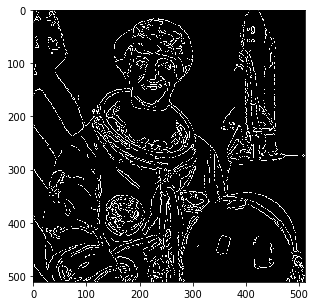

In [26]:
fig, ax7 = plt.subplots(ncols=1, figsize=(5,5), sharex=True, sharey=True)
ax7.imshow(foto_bordes, cmap='gray')
ax7.set_adjustable('box')